# Testing Notebook

### Imports and Data Input

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import interpolate
import time
import data_files

"""Import Data"""
data = data_files.runs_dict

# data_files.file_summary

/home/rtostrander/photon-range-estimator/data_files.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_dict[run][col] = pd.to_numeric(runs_dict[run][col])
/home/rtostrander/photon-range-estimator/data_files.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_dict[run]['Time'] = pd.to_datetime(runs_dict[run]['Time'], format="%H:%M:%S")
/home/rtostrander/photon-range-estimator/data_files.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

### Dashboard of Chosen Run

In [2]:
data_files.file_summary

,File,Run,Time (min),Max Speed (kts),Avg Speed (kts),Battery Expended (%),Distance Traveled (nm),Average Consumption (kWh/nm)
0,L230212.CSV,Run 1,55.366667,12.885820,7.593049,9,3.640755,1.557369
1,L230214.CSV,Run 2,36.266667,53.546061,11.964766,16,3.716758,2.712041
2,L230214.CSV,Run 3,29.783333,13.188127,7.036758,5,5.687198,0.553876
3,L230214.CSV,Run 4,53.333333,2476.420356,22.987384,16,62.883931,0.160295
4,L230214.CSV,Run 5,807.733333,1.511534,0.061909,11,0.433210,15.996873
5,L230215.CSV,Run 6,32.650000,12.281206,7.691644,5,2.163386,1.456051
6,L230215.CSV,Run 7,46.916667,13.528220,5.756903,9,2.294071,2.471589
7,L230215.CSV,Run 8,67.016667,21.388191,8.323351,18,4.779599,2.372584
8,L230215.CSV,Run 9,44.200000,12.885820,8.249534,13,3.268552,2.505696
9,L230216.CSV,Run 10,43.683333,1.851629,0.545620,3,0.213660,8.845834


File                            L230414.CSV
Run                                  Run 31
Time (min)                        50.016667
Max Speed (kts)                   24.297895
Avg Speed (kts)                   12.437385
Battery Expended (%)                     42
Distance Traveled (nm)             5.333644
Average Consumption (kWh/nm)       4.960961
Name: 30, dtype: object


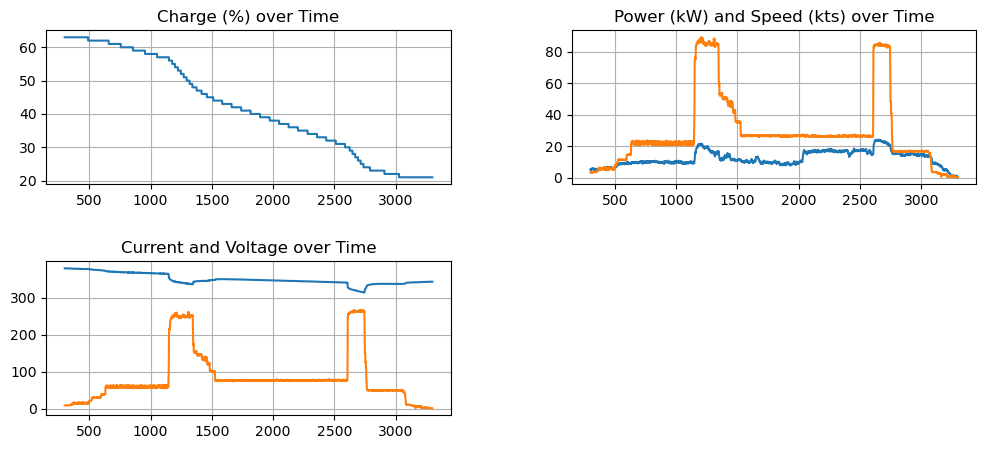

In [9]:
"""Format and clean test data:"""
run = 31                                    # Pick a run from the dictionary to simulate that data

columns = ['Date', 'Time', 'Lat', 'Lon', 'Speed m/s', 'Distance km',
        'RPM 1', 'Motor Load 1 %', 'Motor Torque 1 %', 'Motor Temp 1 C',
        'Pack Current 1 A', 'Pack Voltage 1 V', 'Pack Temp 1 C', 'SOC 1 %',
        'Power 1 kW', 'Speed kts', 'Distance nm'
        ## 'Battery Health', 'Water Speed'
        ]

df = data['Run %i' % run][columns]
print(data_files.file_summary.iloc[run-1])

'''Summary Plots'''
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
plt.plot(df.index, df['SOC 1 %'])
plt.grid()
plt.title('Charge (%) over Time')

plt.subplot(2,2,2)
plt.plot(df.index, df['Speed kts'], df['Power 1 kW'])
plt.grid()
plt.title('Power (kW) and Speed (kts) over Time')

plt.subplot(2,2,3)
plt.plot(df.index, df['Pack Voltage 1 V'], df['Pack Current 1 A'])
plt.grid()
plt.title('Current and Voltage over Time')

# plt.subplot(2,2,4)
# plt.plot(df.index)
# plt.grid()
# plt.title('Empty')

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.3)

### Define Algorithms

In [4]:
def overall_avg(initial_data, current_data, batt_cap):
    """This function is based on an overall average of all the data in the trip.
    Takes in a dataframe from the vessel and the capacity of the battery."""

    # dist_list = []

    # for i in range(len(data)):
    #     batt = data['SOC 1 %%'].iloc[i]*batt_cap/100
    #     avg_batt_consumed = (data['SOC 1 %'].iloc[0] - data['SOC 1 %'].iloc[i])*batt_cap/100          #kWh
    #     avg_dist_traveled = (data['Distance nm'].iloc[i] - data['Distance nm'].iloc[0])               #nm

    batt = current_data['SOC 1 %']*batt_cap/100
    total_batt_consumed = (initial_data['SOC 1 %'] - current_data['SOC 1 %'])*batt_cap/100
    total_dist_traveled = current_data['Distance nm'] - initial_data['Distance nm']
    total_time_traveled = current_data['Time'] - initial_data['Time']

    # avg_consumption = total_batt_consumed/total_dist_traveled             #kWh/nm
    # dist_remaining = batt/avg_consumption                                 #nm

    avg_consumption = total_batt_consumed/(total_time_traveled.seconds/3600)       #kWh/hr
    time_remaining = batt/avg_consumption                                   #hr
    dist_remaining = time_remaining*current_data['Speed kts']               #nm
    

        # dist_list.append(dist_remaining)

    return dist_remaining



def rolling_avg(data, batt_cap, N):
    """This function is based on a rolling average consumption rate of N data points.
    Any consumption rates that are not valid, or within the first N data points of the run,
    will default to using the stored average consumption rate."""

    dist_list = []

    cached_avg = data_files.file_summary.iloc[run-1]['Average Consumption (kWh/nm)']       # need a cached average value to default to 
    for i in range(len(data)):
        batt = data['SOC 1 %'].iloc[i]*batt_cap/100
        roll_batt_consumed = (data['SOC 1 %'].iloc[i-N] - data['SOC 1 %'].iloc[i])*batt_cap/100          #kWh
        roll_dist_traveled = (data['Distance nm'].iloc[i] - data['Distance nm'].iloc[i-N])                  #nm
        roll_consumption = roll_batt_consumed/roll_dist_traveled                                            #kWh/nm
        
        if i < N or roll_consumption==0:
            dist_remaining = batt/cached_avg      # This will need to change because we won't know the average with real-time data
            print('%d Batt: %.1f | Consumption Rate: %.2f kWh/nm | Dist Remaining %.1f nm' % (i, batt, cached_avg, dist_remaining), end=' \r')
            # time.sleep(0.001)
        else:
            dist_remaining = batt/roll_consumption   #nm
            print('%d Batt: %.1f | Consumption Rate: %.2f kWh/nm | Dist Remaining: %.2f nm' % (i, batt, roll_consumption, dist_remaining), end=' \r')
            # time.sleep(.001)

        dist_list.append(dist_remaining)

    return dist_list



def update_average():
    """This is a function to update the stored average consumption of the vessel."""

    pass


### Overall Avg Testing Loop

/tmp/ipykernel_982/3359315373.py:20: RuntimeWarning: invalid value encountered in double_scalars
  avg_consumption = total_batt_consumed/(total_time_traveled.seconds/3600)       #kWh/hr
/tmp/ipykernel_982/3359315373.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  time_remaining = batt/avg_consumption                                   #hr


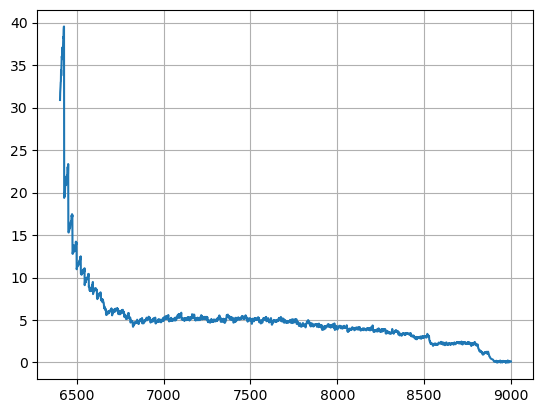

In [5]:
"""
Testing Loop:
    -Loop through CSV rows and update estimated mileage on each iteration
    -Call functions within test loop
"""
dist_list = []
for i in range(len(df)):
    current_data = df.iloc[i]
    initial_data = df.iloc[0]
    
    dist_remaining = overall_avg(initial_data, current_data, 63)
    print('%d Batt: %.1f | Dist Remaining: %.2f nm' % (i, current_data['SOC 1 %'], dist_remaining), end=' \r')
    # time.sleep(.001)

    dist_list.append(dist_remaining)

plt.plot(df.index, dist_list)
plt.grid()


In [6]:
"""Accuracy Comparison"""
'''Look at how far the vessel traveled 30s later'''

df['Dist Prediction (nm)'] = dist_list
df['Interval Dist'] = ''
df['Interval Pred'] = ''
df['error'] = ''

interval = 30 #seconds
# for i in range(interval, len(df)):
#     interval_dist = df['Distance nm'].iloc[i] - df['Distance nm'].iloc[i-interval]
#     # interval_pred = df['Dist Prediction (nm)'].iloc[i-interval] - df['Dist Prediction (nm)'][i]
#     df['Interval Dist'].iloc[i] = interval_dist
#     # df['Interval Pred'].iloc[i] = interval_pred

dist_500 = df['Distance nm'].iloc[-1] - df['Distance nm'].iloc[500] # Distance traveled from i=500 on
pred_500 = df['Dist Prediction (nm)'].iloc[500] - df['Dist Prediction (nm)'].iloc[-1] 
print(pred_500, dist_500)

5.551626036186 3.7324360238329994


/tmp/ipykernel_982/2042557636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dist Prediction (nm)'] = dist_list
/tmp/ipykernel_982/2042557636.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Interval Dist'] = ''
/tmp/ipykernel_982/2042557636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

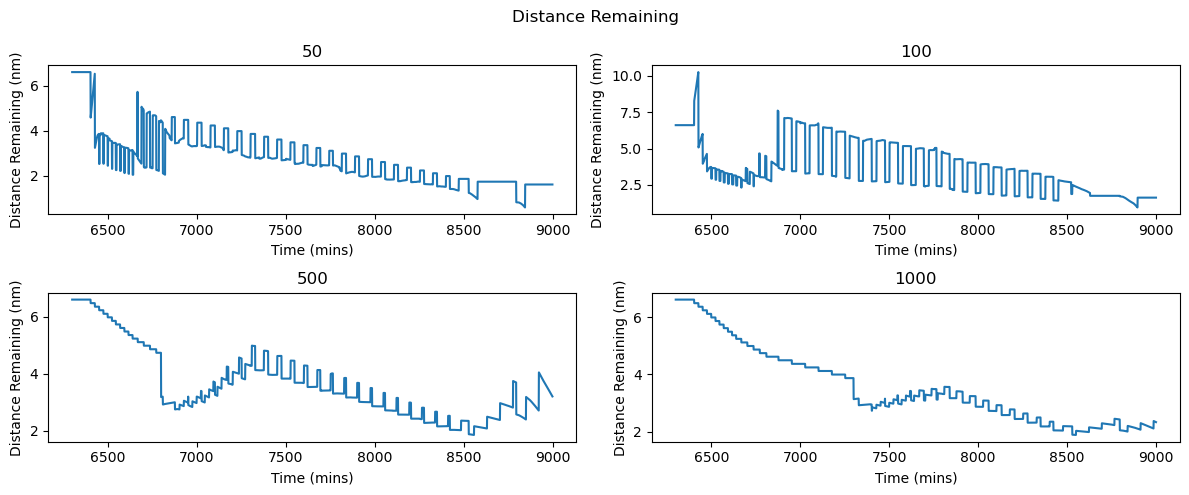

In [7]:
"""Rolling avg plots"""

plt.figure(figsize = (12,5))
plt.suptitle('Distance Remaining')

Nlist = [50, 100, 500, 1000]
rolling_distances = []
# cached_avg = avg_consumption_rate    # This will need to be a locally stored value based on historical data. We want this to be conservative.
for N in Nlist:

    dist_list = rolling_avg(df, 63, N)
    rolling_distances.append(dist_list)

    n = Nlist.index(N)
    plt.subplot(2,2,n+1)
    plt.title(N)
    plt.plot(df.index, rolling_distances[n])
    plt.xlabel("Time (mins)")
    plt.ylabel('Distance Remaining (nm)')

    plt.subplots_adjust(hspace = 0.5)
    plt.subplots_adjust(wspace = 0.3)

plt.tight_layout()


In [8]:
"""Test Loop for Plot: An attempt to plot time versus distance remaining, 
   calculated every 10 seconds in order to smooth final curve.
   Currently not yet working, running into error of 'Output exceeds the 
   size limit. Open the full output data in a text editor'. I am inclined 
   to believe that matplotlib has trouble processing datetime format of the 
   'Time' column. 
"""
sample_list = [1,10,20,30,40,50,60]
distances = []
time0 = [] 
for N in sample_list:
    distanceList = [] 
    time1 = []
    count = 0
    for i in range(len(df)):
        batt = df['SOC 1 %%'].iloc[i]*batt_cap/100        # Change into kWh based on 63 kWh full charge
        dist = batt/avg_consumption_rate            # In km. Will eventually need to be nm
        print('Battery Remaining = %.1f kWh | Distance Remaining = %.1f nm' % (batt, dist), end=' \r')
        # time.sleep(.001)
        count += 1
        if count % N == 0:
            time2 = df['Time'].iloc[i]    #fixed it here, "Only append the current time value"
            time1.append(time2)
            distanceList.append(dist)

    distances.append(distanceList)
    time0.append(time1)

plt.figure(figsize = (17,34))
plt.suptitle('Distance Remaining in Nautical Miles Over the Course of Trip', y=1) 

index = 1
for i in range (0,7):
    plt.subplot(7,2,index)
    index +=1
    plt.title(f'int = {sample_list[i]}')
    plt.plot(time0[i], distances[i])
    space = np.array(range(0,int(np.max(time0[i])),200))
    plt.xticks(space,labels = np.round(space/60,0))
    plt.xlabel("Time (mins)")
    plt.ylabel('Distance Remaining (nm)')

    plt.subplots_adjust(hspace = 0.5)

    #Smooth line version of graph 
    plt.subplot(7,2,index)
    index+=1 
    x_smooth = np.linspace(np.min(time0[i]),np.max(time0[i]),num = 25) #Num represents number of points, play around to affect smoothness
    bspline = interpolate.make_interp_spline(time0[i], distances[i])
    y_smooth = bspline(x_smooth)
    plt.title(f'Smoothing: int = {sample_list[i]}')
    plt.plot(x_smooth,y_smooth)
    plt.xticks(space,labels = np.round(space/60,0))
    plt.xlabel("Time (mins)")
    plt.ylabel('Distance Remaining (nm)')
    plt.subplots_adjust(wspace = 0.3)

plt.tight_layout()

KeyError: 'SOC 1 %%'

In [ ]:
import pandas as pd
import data_files

data = data_files.runs_dict

In [ ]:
from testing_class import testing
from algorithm_class import Range_est

run = 22
df = data['Run %i' % run]
df['tripDistance'] = ''
df['energyUsed'] = ''
df['tripDuration'] = ''

for i in range(len(df)):
    df['tripDistance'].iloc[i] = df['Distance km'].iloc[i] - df['Distance km'].iloc[0]
    df['energyUsed'].iloc[i] = (df['SOC 1 %'].iloc[0] - df['SOC 1 %'].iloc[i])*63/100
    df['tripDuration'].iloc[i] = (df['Time'].iloc[i] - df['Time'].iloc[0]).seconds/60

    dataStream = testing().parse_csv(df.iloc[i])

    # range_remaining = Range_est.overall_avg()
    
print(dataStream)